# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the US Regional Sales Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Create Path to create folder into a string
path = r'C:\Users\E054746\OneDrive - RSM\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\US Regional Sales Analysis'

In [3]:
# Import US Regional Sales Data (scrubbed version)
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_regional_sales_clean_020222.pkl'))

In [15]:
pd.set_option('display.max_columns', None)
df.head(5)

,Order_Number,Sales_Channel,Warehouse_Code,Procured_Date,Order_Date,Months_In_Stock,Ship_Date,Days_To_Process_Order,Delivery_Date,Days_In_Transit,SalesTeam_ID,Customer_ID,Store_ID,Product_ID,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Discounted_Price_PU,Total_Sale,Total Cost,Total Profit,Customer_Names,Product_Name,City_Name,County,State_Code,State,Type,Latitude,Longitude,Population,Household_Income,Median_Income,Time_Zone,Region,Sales_Team
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,5,2018-06-14,14,2018-06-19,5,6,15,259,12,5,0.075,1963.1,1001.181,1815.8675,9079.3375,5005.905,4073.4325,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
1,SO - 0005035,In-Store,WARE-UHY1004,2019-08-23,2020-01-08,4,2020-01-15,7,2020-01-21,6,6,47,259,1,3,0.150,1755.4,1298.996,1492.0900,4476.2700,3896.988,579.2820,Niconovum Corp,Cookware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
2,SO - 0006409,In-Store,WARE-UHY1004,2020-03-10,2020-06-17,3,2020-07-03,16,2020-07-12,9,6,41,259,16,5,0.075,3544.3,2020.251,3278.4775,16392.3875,10101.255,6291.1325,Weimei Corp,Stemware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
3,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,4,2020-08-15,25,2020-08-16,1,6,48,259,6,3,0.075,2492.4,1246.200,2305.4700,6916.4100,3738.600,3177.8100,"Fenwal, Corp",Computers,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
4,SO - 0007028,In-Store,WARE-NMK1003,2020-06-18,2020-08-29,2,2020-09-11,13,2020-09-14,3,6,44,112,14,3,0.200,3993.2,3034.832,3194.5600,9583.6800,9104.496,479.1840,Winthrop,Mirrors,Waterbury (Town),New Haven County,CT,Connecticut,Town,41.55850,-73.03668,108802,40213,40467,America/New York,Northeast,Joshua Bennett


In [16]:
df.shape

(7991, 37)

In [17]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Warehouse_Code', 'Procured_Date',
       'Order_Date', 'Months_In_Stock', 'Ship_Date', 'Days_To_Process_Order',
       'Delivery_Date', 'Days_In_Transit', 'SalesTeam_ID', 'Customer_ID',
       'Store_ID', 'Product_ID', 'Order_Quantity', 'Discount_Applied',
       'Unit_Price', 'Unit_Cost', 'Discounted_Price_PU', 'Total_Sale',
       'Total Cost', 'Total Profit', 'Customer_Names', 'Product_Name',
       'City_Name', 'County', 'State_Code', 'State', 'Type', 'Latitude',
       'Longitude', 'Population', 'Household_Income', 'Median_Income',
       'Time_Zone', 'Region', 'Sales_Team'],
      dtype='object')

In [18]:
#For this time-series analysis I will use the Region category and will start with the West since that region has the highest sales. 
west = df.loc[df['Region'] == 'West']

In [19]:
west.head()

,Order_Number,Sales_Channel,Warehouse_Code,Procured_Date,Order_Date,Months_In_Stock,Ship_Date,Days_To_Process_Order,Delivery_Date,Days_In_Transit,SalesTeam_ID,Customer_ID,Store_ID,Product_ID,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Discounted_Price_PU,Total_Sale,Total Cost,Total Profit,Customer_Names,Product_Name,City_Name,County,State_Code,State,Type,Latitude,Longitude,Population,Household_Income,Median_Income,Time_Zone,Region,Sales_Team
12,SO - 000558,In-Store,WARE-NMK1003,2018-04-10,2018-07-23,3,2018-08-01,9,2018-08-07,6,6,35,95,8,8,0.200,2298.1,1539.727,1838.4800,14707.840,12317.816,2390.024,Amylin Group,Cocktail Glasses,Denver,Denver County,CO,Colorado,City,39.73915,-104.98470,682545,275795,53637,America/Denver,West,Joshua Bennett
15,SO - 0004131,In-Store,WARE-UHY1004,2019-05-15,2019-09-20,4,2019-10-15,25,2019-10-17,2,6,50,255,31,6,0.150,1085.4,868.320,922.5900,5535.540,5209.920,325.620,Sundial,Candleholders,Reno,Washoe County,NV,Nevada,City,39.52963,-119.81380,241445,92283,47012,America/Los Angeles,West,Joshua Bennett
16,SO - 0002401,In-Store,WARE-NBV1002,2018-10-27,2019-02-21,3,2019-03-08,15,2019-03-17,9,6,46,77,6,6,0.075,5487.3,4060.602,5075.7525,30454.515,24363.612,6090.903,U.S. Ltd,Computers,Santa Maria,Santa Barbara County,CA,California,City,34.95303,-120.43572,105093,27365,50433,America/Los Angeles,West,Joshua Bennett
21,SO - 0001183,In-Store,WARE-XYS1001,2018-07-19,2018-10-05,2,2018-10-25,20,2018-11-03,9,6,45,17,40,8,0.075,3979.8,2865.456,3681.3150,29450.520,22923.648,6526.872,Nipro,Rugs,Antioch,Contra Costa County,CA,California,City,38.00492,-121.80579,110542,33718,64329,America/Los Angeles,West,Joshua Bennett
22,SO - 0002995,In-Store,WARE-XYS1001,2019-02-04,2019-05-05,3,2019-05-24,19,2019-05-27,3,6,16,17,32,1,0.100,1936.3,929.424,1742.6700,1742.670,929.424,813.246,"3LAB, Ltd",Vases,Antioch,Contra Costa County,CA,California,City,38.00492,-121.80579,110542,33718,64329,America/Los Angeles,West,Joshua Bennett


In [20]:
#Check the number of years for the West sales data
west['Order_Date'].min() , west['Order_Date'].max() #We have three years of data

(Timestamp('2018-05-31 00:00:00'), Timestamp('2020-12-29 00:00:00'))

### Wrangling and Subsetting Data

In [11]:
# This step includes removing columns we do not need, check missing values,duplicate, aggregate sales by date

In [21]:
#Create a cols df to remove all the columns in the west df except for Order_Date column
cols = ['Order_Number', 'Sales_Channel', 'Warehouse_Code', 'Procured_Date', 
        'Months_In_Stock', 'Ship_Date', 'Days_To_Process_Order','Delivery_Date', 'Days_In_Transit', 
        'SalesTeam_ID', 'Customer_ID','Store_ID', 
        'Product_ID', 'Order_Quantity', 'Discount_Applied','Unit_Price', 'Unit_Cost', 'Discounted_Price_PU', 
        'Total Cost', 'Total Profit', 'Customer_Names', 'Product_Name','City_Name', 'County', 
        'State_Code', 'State', 'Type', 'Latitude','Longitude', 'Population', 'Household_Income', 
        'Median_Income','Time_Zone', 'Region', 'Sales_Team']

In [22]:
west.drop(cols, axis=1, inplace=True) #drop the columns in the cols df

In [23]:
west = west.sort_values('Order_Date') #Sort data by date

In [24]:
#check west df
west.head()

,Order_Date,Total_Sale
3217,2018-05-31,4054.84
7474,2018-06-01,3545.64
7629,2018-06-01,1298.46
3442,2018-06-01,1085.40
5037,2018-06-02,17032.74


In [30]:
west.shape #check shape after filtering west region

(887, 2)

In [25]:
west.columns

Index(['Order_Date', 'Total_Sale'], dtype='object')

In [29]:
#Agreggate Total_Sale by date
west = west.groupby('Order_Date')['Total_Sale'].sum().reset_index()

In [31]:
west.shape #check shape after agreggating results

(887, 2)

In [32]:
# Check for missing values 

west.isnull().sum()

Order_Date    0
Total_Sale    0
dtype: int64

In [33]:
# Check for duplicates

dups = west.duplicated()
dups.sum()

# No dups!

0

In [34]:
# Set the "Order_Date" column as the index

from datetime import datetime

west['datetime'] = pd.to_datetime(west['Order_Date']) # Create a datetime column from Order Date
west = west.set_index('datetime') # Set the datetime as the index of the dataframe.
west.drop(['Order_Date'], axis=1, inplace=True) # Drop the "Ordet_Date" column.
west.head()

,Total_Sale
datetime,
2018-05-31,4054.8400
2018-06-01,5929.5000
2018-06-02,23400.4200
2018-06-03,50605.2675
2018-06-04,36486.5250


In [36]:
# My data has daily values and this can be hard to work with. Therefore, I will use the averages of daily sales value for that month instead.
west_sub = west['Total_Sale'].resample('MS').mean()

### Question 3 explain what logic you were following when selecting your data points.
- The work above relates to question 3
- I used a subset of the data for the West region, as this region had the highest sales. 
- Because the data has 3 years worth of sales data, I did not subset the data by years. However, because my data contained daily sales, I have to use the average daily sales for each month using the start of each month as the datetime. 

### Question 4 Create a line chart of your data

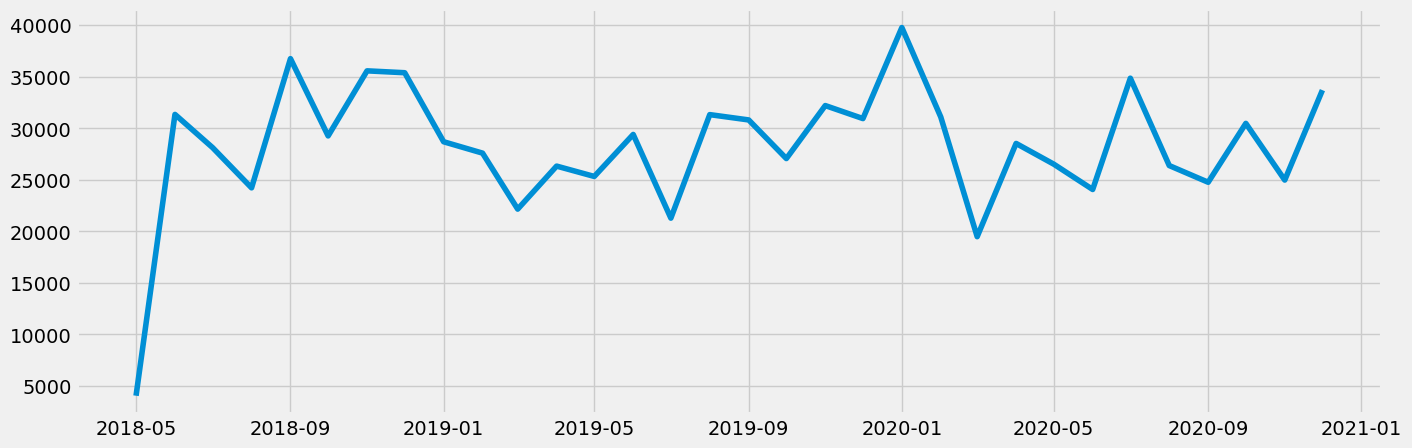

In [37]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(west_sub)

### Question 5 Decompose the data's components ad analyze the results

In [38]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(west_sub, model='additive')

In [39]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

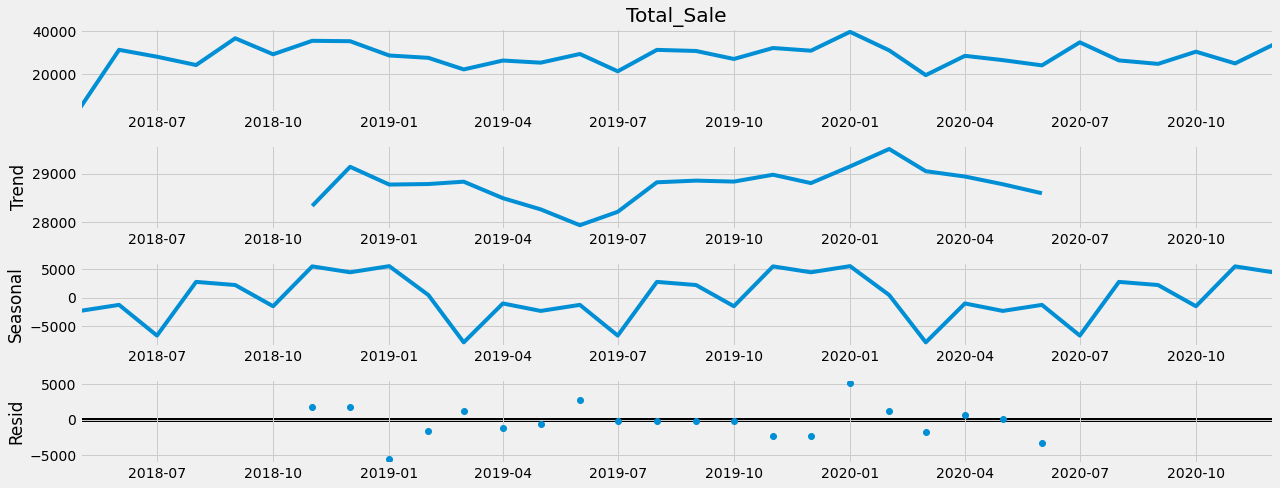

In [40]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Analyzing the results
- Trend: The trend in the chart above shows a sharp decline from April of 2019 to July of the same year, and then again increasing. It almost seems that in July sales in the West go down. 
- Seasonlity: Again we see that sales in the month of April and July are low in the West. This probably means that the company's high season in the West start from the Fall to the Winter. 
- Noise: Because I had to smooth out the data you see and up and down deviations. In this chart, you can see that there was a period in January of 2019 that sales were very low but really high back in 2020. 

### Question 6 Conduct a Dickey-Fuller test to check for stationarity and interpret the results

In [45]:
west_sub.head()

datetime
2018-05-01     4054.840000
2018-06-01    31335.098393
2018-07-01    28112.083333
2018-08-01    24213.499655
2018-09-01    36741.249074
Freq: MS, Name: Total_Sale, dtype: float64

In [46]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(west['Total_Sale'])

Dickey-Fuller Stationarity test:
Test Statistic                 -30.005722
p-value                          0.000000
Number of Lags Used              0.000000
Number of Observations Used    886.000000
Critical Value (1%)             -3.437752
Critical Value (5%)             -2.864808
Critical Value (10%)            -2.568510
dtype: float64


#### Based on the dickey_fuller test, the Test statistic is significantly smaller than the critical value (5%). As a result, I can reject the null hypothesis. This means that my data is stationary. 

### Question 9 Check your data's autocorrelation

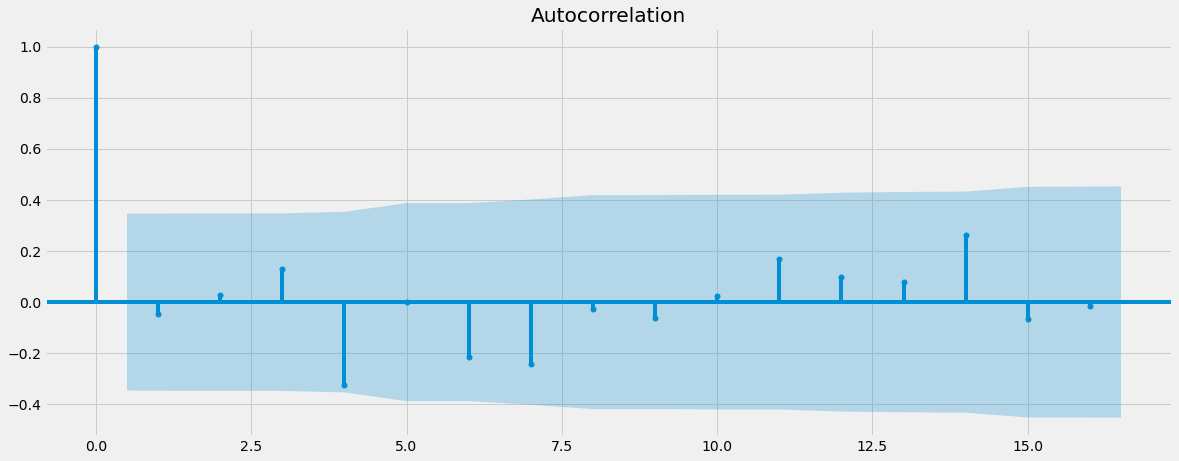

In [47]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation and partial correlation plots

plot_acf(west_sub)
plt.show()

#### The autocorrelation verifies that the lags are not correlated with each other, as most of the lines are not above the confidence level. 